Main file for the code used in the Machine Learning course project.

In [11]:
#Importing all the necessary libraries that are used in the program
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [43]:
def boolToNum(boolArr):
    for i in range(len(boolArr)):
        if boolArr[i]:
            boolArr[i] = 1 
        else:
            boolArr[i] = 0
        
    return boolArr

First, the data is imported from the data file 'notebooks/ML_project_code/nearest-earth-objects(1910-2024).csv'.
The data is then separated into single feature and label arrays.

In [44]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

#cleaning up the data
data = df.drop(['neo_id', 'name','orbiting_body'], axis = 1)
data = data.dropna()

#shuffling the data to get randomized training, testing and validation sets 
np_data = data.to_numpy()
np.random.shuffle(np_data)

len(df['absolute_magnitude'])
length = 0.6*len(df['absolute_magnitude'])


#training set: 60% of the data
full_set_size = len(np_data)
training_set_size = int(len(df['absolute_magnitude'])//(100/60))
valid_set_size = int((full_set_size-training_set_size)/2)

X_train = np_data[0:training_set_size,0:5]
X_valid = np_data[training_set_size+1:training_set_size+valid_set_size, 0:5]
X_test = np_data[training_set_size+valid_set_size+1:full_set_size, 0:5]

y_train = np_data[0:training_set_size,5]
y_valid = np_data[training_set_size+1:training_set_size+valid_set_size, 5]
y_test = np_data[training_set_size+valid_set_size+1:full_set_size, 5]

y_train = boolToNum(y_train)
y_valid = boolToNum(y_valid)
y_test = boolToNum(y_test)


                        

#All five features
fe_absolute_magnitude = df['absolute_magnitude'].values
fe_estimated_diameter_min = df['estimated_diameter_min'].values
fe_estimated_diameter_max = df['estimated_diameter_max'].values
fe_relative_velocity = df['relative_velocity'].values
fe_miss_distance = df['miss_distance'].values

#The boolean label
la_is_hazardous_ = df['is_hazardous'].values

Plotting the features:

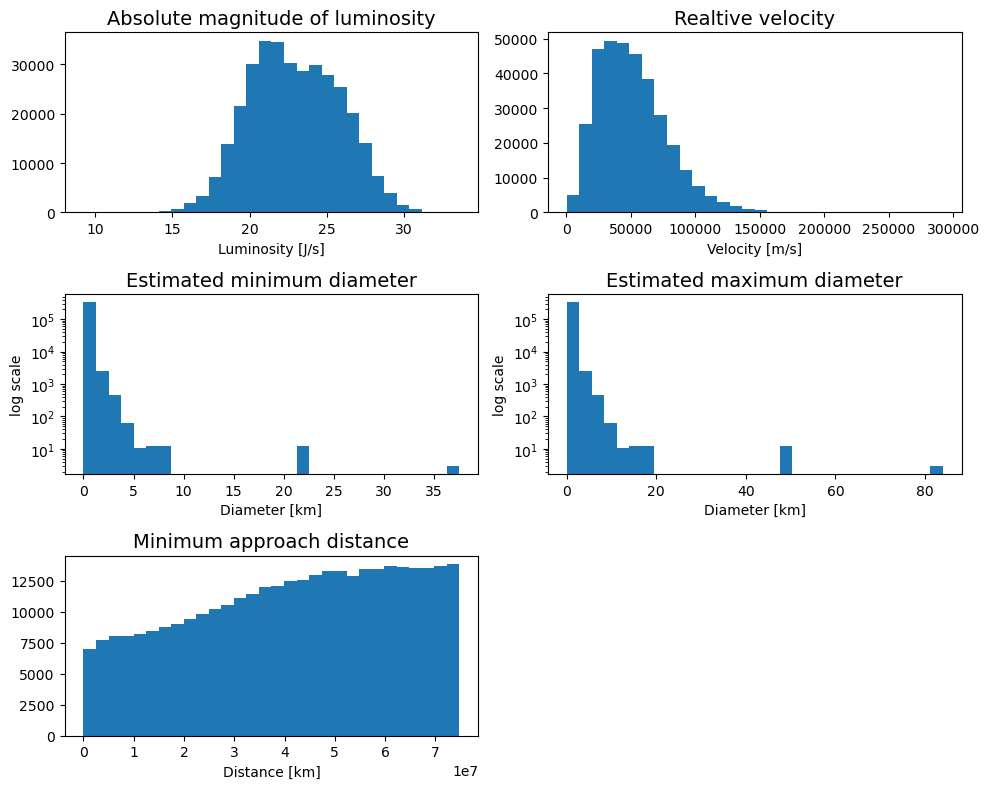

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2, tight_layout=False, figsize=(10,8))

ax[0][0].hist(fe_absolute_magnitude,bins=30);
ax[0][0].set_title('Absolute magnitude of luminosity', fontsize=14)
ax[0][0].set_xlabel('Luminosity [J/s]', fontsize=10)

ax[0][1].hist(fe_relative_velocity,bins=30);
ax[0][1].set_title('Realtive velocity', fontsize=14)
ax[0][1].set_xlabel('Velocity [m/s]', fontsize=10)


ax[1][0].hist(fe_estimated_diameter_min,bins=30,log=True);
ax[1][0].set_title('Estimated minimum diameter', fontsize=14)
ax[1][0].set_xlabel('Diameter [km]', fontsize=10)
ax[1][0].set_ylabel('log scale', fontsize=10)

ax[1][1].hist(fe_estimated_diameter_max,bins=30,log=True);
ax[1][1].set_title('Estimated maximum diameter', fontsize=14)
ax[1][1].set_xlabel('Diameter [km]', fontsize=10)
ax[1][1].set_ylabel('log scale', fontsize=10)

ax[2][0].hist(fe_miss_distance,bins=30);
ax[2][0].set_title('Minimum approach distance', fontsize=14)
ax[2][0].set_xlabel('Distance [km]', fontsize=10)

fig.delaxes(ax[2][1])


Plotting the label:

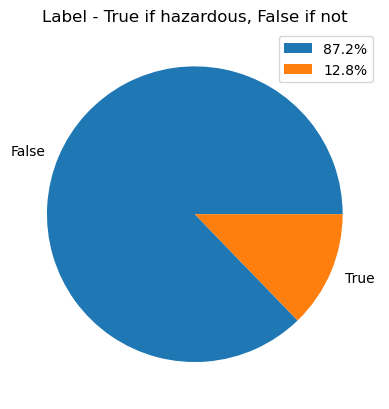

In [5]:
#Number of hazardouns (True) and nonhazardous (False) labels
nr_true = len(la_is_hazardous_[la_is_hazardous_ == True]);
nr_false = len(la_is_hazardous_[la_is_hazardous_ == False]);

#Percents of True and False labels
percent_true = np.round(nr_true/len(la_is_hazardous_)*100,1)
percent_false = np.round(nr_false/len(la_is_hazardous_)*100,1)

#Pie plot of the labels
plt.pie([nr_false, nr_true], labels=['False', 'True']);
plt.title('Label - True if hazardous, False if not');
plt.legend([str(percent_false)+'%', str(percent_true)+'%']);

Multi-layer percepton

In [57]:
def train_model(hidden_layer_shape=(16,8), max_iter=100,  random_state=35):
    # Create an MLPClassifier model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_shape, max_iter=max_iter, random_state=random_state)
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_ = scaler.fit_transform(X_train)
    X_valid_ = scaler.transform(X_valid)
    
    y_train_ = y_train.astype('int')
    y_valid_ = y_valid.astype('int')

    # Train the model on the training data
    print(len(X_train_))
    mlp.fit(X_train_, y_train_)

    # Make predictions on the test data
    y_pred = mlp.predict(X_valid_)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_valid_, y_pred)
    
    return y_pred, accuracy, mlp



In [66]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

hidden_layers = [(4,2), (8,4), (16,8), (32,16), (64,32), (8,8,8), (16,8,8), (16,16,8), (16,32,16), (16,32,32,16), (32,16,16,8)]
l = len(hidden_layers)
y_pred_arr = np.zeros((l, valid_set_size-1))
accuracy_arr = np.zeros(l)
mlp_arr = []

for i in range(len(hidden_layers)):
    y_pred_, accuracy_, mlp_ = train_model(hidden_layers[i], 200, 35)
    print(y_pred_)
    y_pred_arr[i,:] = y_pred_
    accuracy_arr[i] = accuracy_
    mlp_arr.append(mlp_)



202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]
202919
[0 0 0 ... 0 0 0]


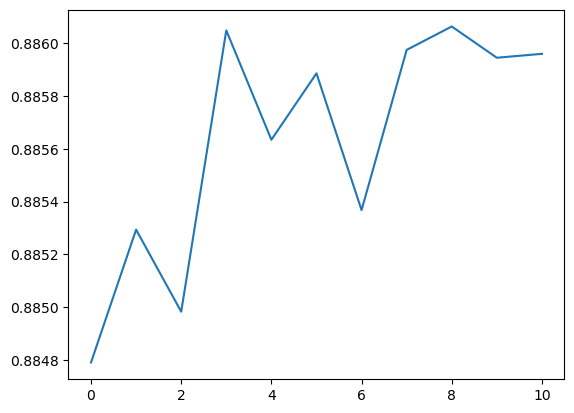

In [67]:
plt.plot(accuracy_arr)

In [36]:
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

print(y.shape)
print(y_train[0:5].shape)

(569,)
(5,)


In [ ]:
#Logistic regression
